In [1]:
# importing the necessary libraries
import pandas as pd
import rasterio
import os
import numpy as np

In [2]:
mask_dir = "/shared_space/BrazilSPEI/MODIS/Reclass_Data"

In [3]:
os.listdir(mask_dir)

['MCD12Q1_Maranhao_2004_forest.tif',
 'MCD12Q1_Maranhao_2006_pasture.tif',
 'MCD12Q1_Maranhao_2007_multiclass.tif',
 'MCD12Q1_Maranhao_2008_multiclass.tif',
 'MCD12Q1_Maranhao_2016_forest.tif',
 'MCD12Q1_Maranhao_2023_agri.tif',
 'MCD12Q1_Maranhao_2005_pasture.tif',
 'MCD12Q1_Maranhao_2012_forest.tif',
 'MCD12Q1_Maranhao_2023_multiclass.tif',
 'MCD12Q1_Maranhao_2008_agri.tif',
 'MCD12Q1_Maranhao_2022_multiclass.tif',
 'MCD12Q1_Maranhao_2001_forest.tif',
 'MCD12Q1_Maranhao_2021_forest.tif',
 'MCD12Q1_Maranhao_2004_multiclass.tif',
 'MCD12Q1_Maranhao_2006_forest.tif',
 'MCD12Q1_Maranhao_2024_agri.tif',
 'MCD12Q1_Maranhao_2005_multiclass.tif',
 'MCD12Q1_Maranhao_2009_multiclass.tif',
 'MCD12Q1_Maranhao_2014_pasture.tif',
 'MCD12Q1_Maranhao_2013_forest.tif',
 'MCD12Q1_Maranhao_2004_pasture.tif',
 'MCD12Q1_Maranhao_2011_agri.tif',
 'MCD12Q1_Maranhao_2003_agri.tif',
 'MCD12Q1_Maranhao_2011_forest.tif',
 'MCD12Q1_Maranhao_2021_pasture.tif',
 'MCD12Q1_Maranhao_2024_forest.tif',
 'MCD12Q1_Maran

In [4]:
records = []

In [9]:
for fname in sorted(os.listdir(mask_dir)):
    if not fname.endswith("_forest.tif"):
        continue
    
    year = int(fname.split("_")[2])
    path = os.path.join(mask_dir, fname)
    
    with rasterio.open(path) as src:
        arr = src.read(1)
        
    forest_pixels = np.sum(arr == 1)
    forest_area_km2 = forest_pixels * 0.25
    
    records.append((year, forest_pixels, forest_area_km2))

In [13]:
fname.split("_")[2]

'2024'

In [10]:
df = pd.DataFrame(records, columns = ["Year", "Forest_pixels", "Forest_km2"])
df = df.sort_values("Year").reset_index(drop = True)

In [11]:
df

,Year,Forest_pixels,Forest_km2
0,0,342918,85729.50
1,0,383102,95775.50
2,1,529550,132387.50
3,1,345628,86407.00
4,1,400809,100202.25
5,2,491295,122823.75
6,2,349168,87292.00
7,2,353087,88271.75
8,3,462446,115611.50
9,3,342816,85704.00


In [8]:
# computing change and percent change
df["Change_km2"] = df["Forest_km2"].diff()
df["Pct_change"] = df["Forest_km2"].pct_change() * 100
df

,Year,Forest_pixels,Forest_km2,Change_km2,Pct_change
0,2001,678301,169575.25,NaN,NaN
1,2002,651023,162755.75,-6819.50,-4.021518e+00
2,2003,638813,159703.25,-3052.50,-1.875510e+00
3,2004,614635,153658.75,-6044.50,-3.784832e+00
4,2005,599656,149914.00,-3744.75,-2.437056e+00
5,2006,594555,148638.75,-1275.25,-8.506544e-01
6,2007,25,6.25,-148632.50,-9.999580e+01
7,2008,585929,146482.25,146476.00,2.343616e+06
8,2009,595685,148921.25,2439.00,1.665048e+00
9,2010,589317,147329.25,-1592.00,-1.069021e+00


In [9]:
# time-series plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Forest_km2"], marker = "o")
plt.xlabel("Year")
plt.ylabel("Forest Area (km2)")
plt.title("Forest Area in Maranhao (2001-2003)")
plt.grid(True)
plt.show()

<Figure size 1000x500 with 1 Axes>

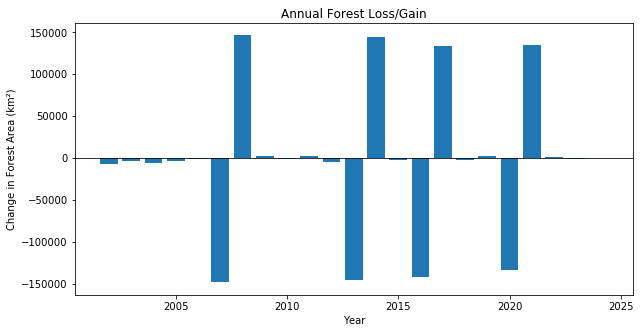

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df["Year"], df["Change_km2"])
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel("Year")
plt.ylabel("Change in Forest Area (km²)")
plt.title("Annual Forest Loss/Gain")
plt.show()


In [11]:
path = '/shared_space/BrazilSPEI/MODIS/Reclass_Data_Files/MCD12Q1.061_LC_Type1_doy2007001000000_aid0001_forest.tif'

with rasterio.open(path) as src:
    print(src.width, src.height)
    print(src.count)
    print(src.bounds)
    print(src.nodata)

1671 2212
1
BoundingBox(left=-48.75833332895492, bottom=-10.262499999078443, right=-41.79583332958014, top=-1.0458333332394192)
255.0


In [12]:
path = '/shared_space/BrazilSPEI/MODIS/Reclass_Data_Files/MCD12Q1.061_LC_Type1_doy2001001000000_aid0001_forest.tif'

with rasterio.open(path) as src:
    print(src.width, src.height)
    print(src.count)
    print(src.bounds)
    print(src.nodata)

1671 2212
1
BoundingBox(left=-48.75833332895492, bottom=-10.262499999078443, right=-41.79583332958014, top=-1.0458333332394192)
255.0


In [13]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2013001000000_aid0001.tif'

with rasterio.open(path) as src:
    print(src.width, src.height)
    print(src.count)
    print(src.bounds)
    print(src.nodata)

1671 2212
1
BoundingBox(left=-48.75833332895492, bottom=-10.262499999078443, right=-41.79583332958014, top=-1.0458333332394192)
255.0


In [14]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2007001000000_aid0001.tif'

with rasterio.open(path) as src:
    arr = src.read(1)

print("Unique values:", np.unique(arr)[:50])

Unique values: [  2   6   7   8   9  10 255]


In [15]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2001001000000_aid0001.tif'

with rasterio.open(path) as src:
    arr = src.read(1)

print("Unique values:", np.unique(arr)[:50])

Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17 255]


In [16]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2013001000000_aid0001.tif'

with rasterio.open(path) as src:
    arr = src.read(1)

print("Unique values:", np.unique(arr)[:50])

Unique values: [  2   4   6   7   8   9  10 255]


In [17]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2016001000000_aid0001.tif'

with rasterio.open(path) as src:
    arr = src.read(1)

print("Unique values:", np.unique(arr)[:50])

Unique values: [  2   5   6   7   8   9  10 255]


In [18]:
path = '/shared_space/BrazilSPEI/MODIS/Data_Files/MCD12Q1.061_LC_Type1_doy2020001000000_aid0001.tif'

with rasterio.open(path) as src:
    arr = src.read(1)

print("Unique values:", np.unique(arr)[:50])

Unique values: [  2   4   6   7   8   9  10  11 255]
